In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


In [104]:
data=pd.read_csv("D:\\datasets\\Salary_Data.csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


# Removing Null values 

In [106]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [107]:
data.dropna(inplace=True)
data.shape

(6698, 6)

In [108]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# view random data 

In [109]:
data.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1707,40.0,Female,PhD,Senior Software Engineer,12.0,160000.0
6018,29.0,Male,Master's Degree,Financial Analyst,5.0,95000.0
1724,35.0,Male,Bachelor's Degree,Back end Developer,8.0,140000.0
1247,24.0,Male,Bachelor's Degree,Front end Developer,1.0,60000.0
5243,29.0,Female,Bachelor's Degree,Digital Marketing Specialist,3.0,60000.0
539,27.0,Female,Bachelor's,Software Engineer,4.0,140000.0
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
3666,31.0,Male,Bachelor's Degree,Software Engineer,4.0,65000.0
3259,48.0,Male,PhD,Director of Data Science,18.0,210000.0
1834,46.0,Male,PhD,Senior Project Engineer,15.0,180000.0


In [110]:
data.Gender.unique()


array(['Male', 'Female', 'Other'], dtype=object)

In [111]:
print(data["Education Level"].nunique())
data["Education Level"].unique()

7


array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [112]:
data["Education Level"]=data["Education Level"].replace({"Bachelor's Degree":"Bachelor's","Master's Degree":"Master's",'phD':'PhD'})

In [113]:
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [114]:
data["Job Title"].nunique()

191

In [115]:
data["Job Title"].value_counts()


Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [116]:
data["Job Title"].count()

6698

In [117]:
#threshold = 2  # Define the threshold for infrequent job titles

#job_counts = data['Job Title'].value_counts()

#infrequent_jobs = job_counts[job_counts< threshold].index
#print(infrequent_jobs)
#data.loc[data['Job Title'].isin(infrequent_jobs), 'Job Title'] = 'Other'


In [118]:
#data['Job Title'].count()

In [119]:
#data['Industry'] = data['Job Title'].apply(lambda x: x.split()[0])
#data.head()

In [120]:
data1=data["Job Title"].value_counts()
data_less50=data1[data1<=60]
data_less50.count()

161

In [121]:
data_less50

Junior HR Generalist          60
Junior Software Developer     58
Receptionist                  57
Director of Data Science      57
Sales Manager                 56
                              ..
Account Manager                1
Help Desk Analyst              1
Senior Training Specialist     1
Junior Web Designer            1
Software Project Manager       1
Name: Job Title, Length: 161, dtype: int64

In [122]:
data["Job Title"]=data["Job Title"].apply(lambda x :"other" if x in data_less50 else x)
data["Job Title"].nunique()

31

In [123]:
data["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'other', 'Sales Associate',
       'Marketing Analyst', 'Product Manager', 'Marketing Coordinator',
       'Software Developer', 'Operations Manager', 'Marketing Manager',
       'Sales Director', 'Financial Manager', 'Product Designer',
       'Data Scientist', 'Director of Marketing', 'Senior Data Scientist',
       'Web Developer', 'Research Director', 'Senior Software Engineer',
       'Content Marketing Manager', 'Research Scientist',
       'Senior Product Marketing Manager', 'Director of HR',
       'Software Engineer Manager', 'Back end Developer',
       'Senior Project Engineer', 'Full Stack Engineer',
       'Front end Developer', 'Junior Sales Associate',
       'Human Resources Manager', 'Marketing Director'], dtype=object)

In [124]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,other,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,other,20.0,200000.0


# Distribution of Catogrical Data 

Text(0.5, 0.98, 'My plot')

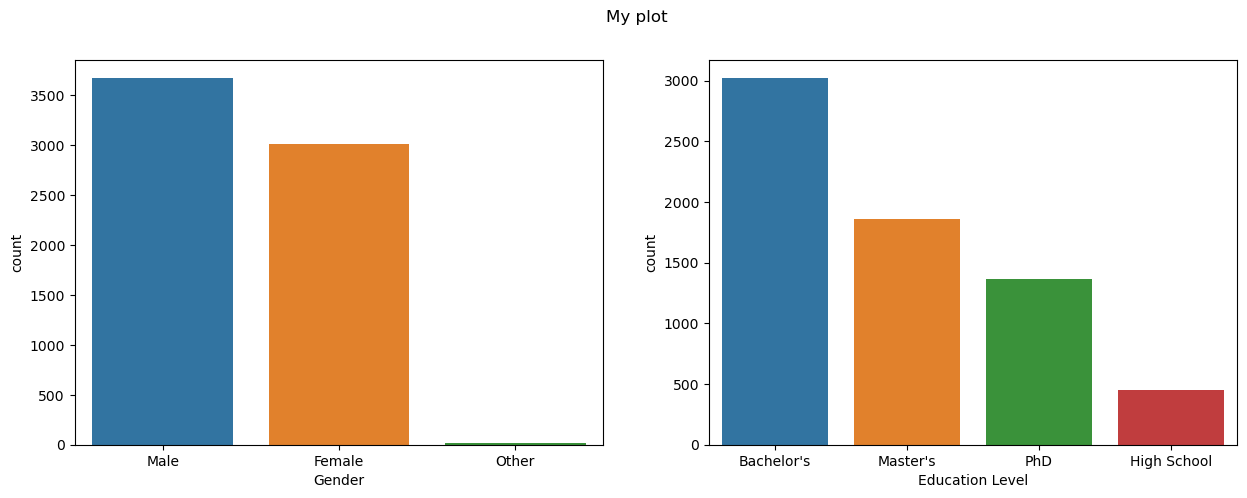

In [125]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="Gender",data=data,ax=ax[0])
sns.countplot(x="Education Level",data=data,ax=ax[1])
fig.suptitle("My plot")


# Distribution of continouis data 

<Axes: xlabel='Salary', ylabel='Count'>

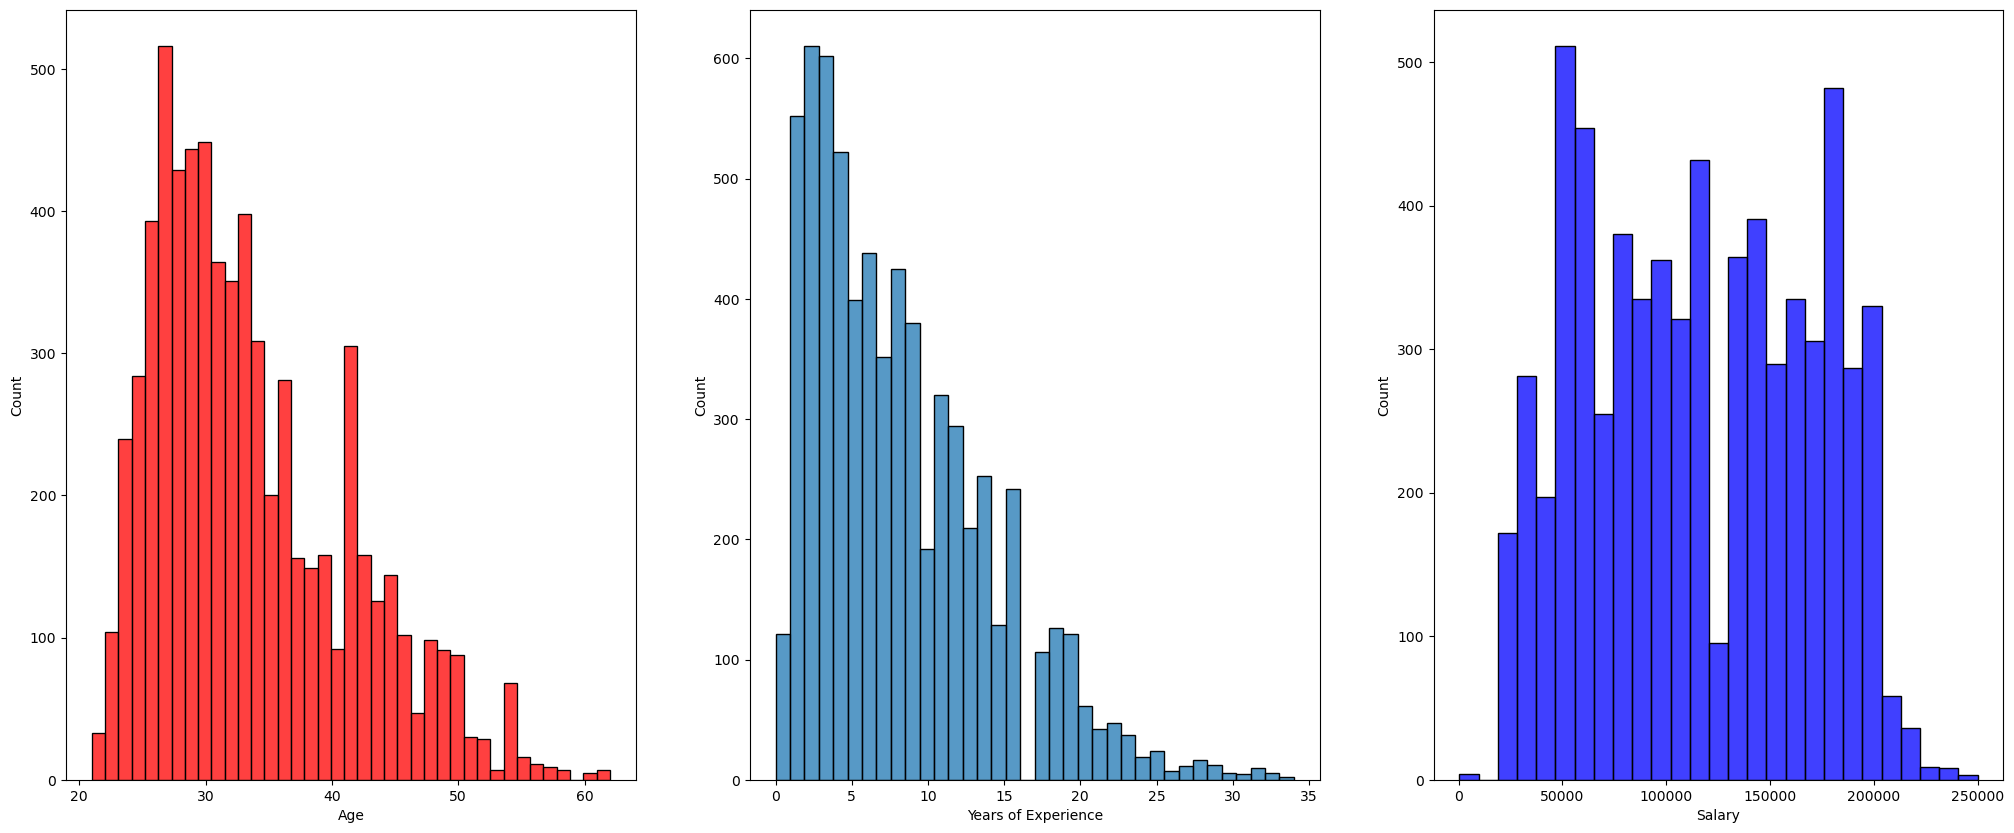

In [126]:
fig,ax=plt.subplots(1,3,figsize=(25,10))
sns.histplot(x="Age",data=data,ax=ax[0],color='r')
sns.histplot(x="Years of Experience",data=data,ax=ax[1])
sns.histplot(x="Salary",data=data,ax=ax[2],color='b')

In [127]:
df=data.groupby("Job Title")["Salary"].mean()
df

Job Title
Back end Developer                  102352.561475
Content Marketing Manager           123150.684932
Data Analyst                        125090.909091
Data Scientist                      166105.960265
Director of HR                      122028.985507
Director of Marketing               137840.909091
Financial Manager                   143059.701493
Front end Developer                  84675.319502
Full Stack Engineer                 126719.840909
Human Resources Manager             108538.461538
Junior Sales Associate               28211.267606
Marketing Analyst                    62916.666667
Marketing Coordinator                81056.962025
Marketing Director                  183984.375000
Marketing Manager                   117164.705882
Operations Manager                   95938.596491
Product Designer                     56200.000000
Product Manager                     142476.038339
Research Director                   163333.333333
Research Scientist                  1653

In [128]:
df.reset_index()

,Job Title,Salary
0,Back end Developer,102352.561475
1,Content Marketing Manager,123150.684932
2,Data Analyst,125090.909091
3,Data Scientist,166105.960265
4,Director of HR,122028.985507
5,Director of Marketing,137840.909091
6,Financial Manager,143059.701493
7,Front end Developer,84675.319502
8,Full Stack Engineer,126719.840909
9,Human Resources Manager,108538.461538


In [129]:
sorted_data=df.sort_values(ascending=False).reset_index()
sorted_data.head(10)

,Job Title,Salary
0,Marketing Director,183984.375000
1,Software Engineer Manager,172502.167553
2,Senior Project Engineer,166224.754717
3,Data Scientist,166105.960265
4,Research Scientist,165362.318841
5,Research Director,163333.333333
6,Senior Software Engineer,151326.688525
7,Senior Data Scientist,151147.540984
8,Financial Manager,143059.701493
9,Product Manager,142476.038339


<Axes: xlabel='Salary', ylabel='Job Title'>

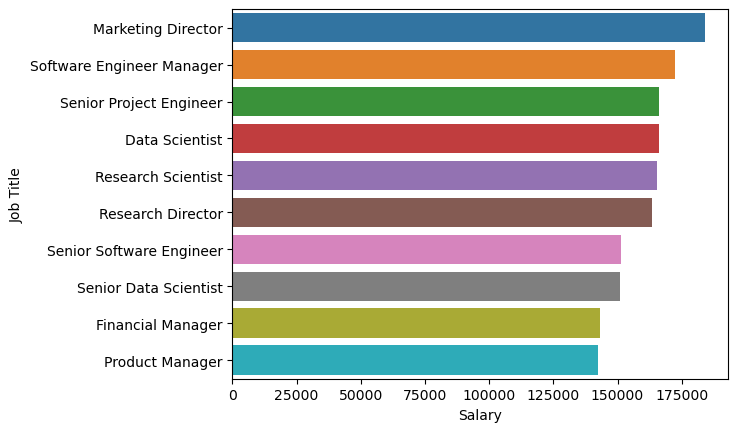

In [130]:
sns.barplot(x="Salary",y="Job Title" ,data=sorted_data.head(10))

# Releationship between target variable 

Text(0.5, 1.0, 'Education Level vs Salary')

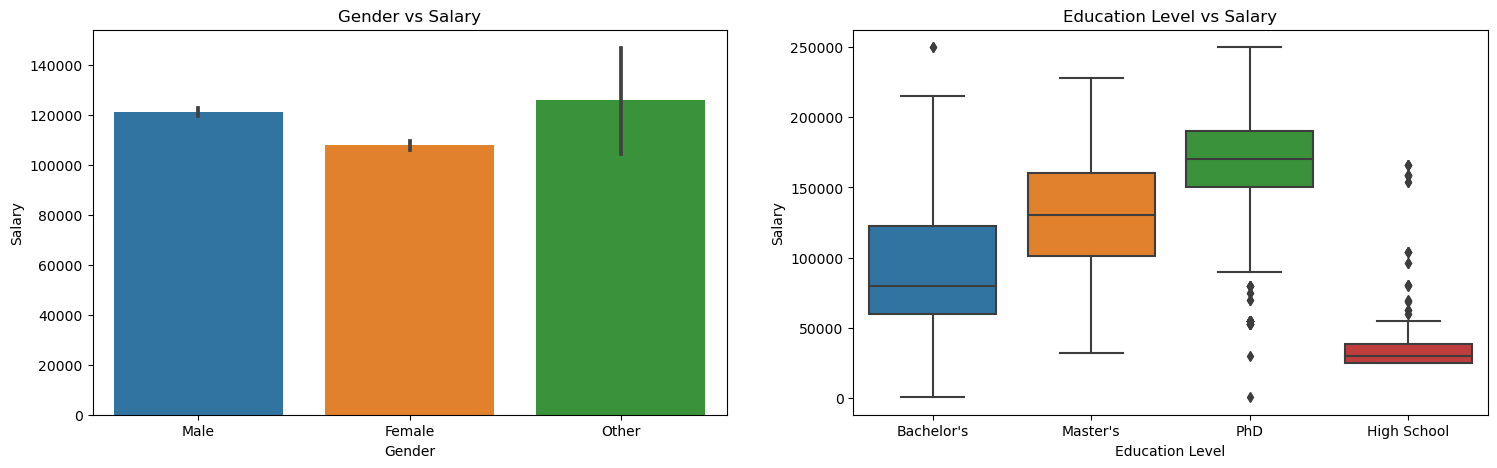

In [131]:
fig,ax=plt.subplots(1,2,figsize=(18,5))
sns.barplot(x="Gender",y="Salary",data=data,ax=ax[0]).set_title("Gender vs Salary")
sns.boxplot(x="Education Level",y="Salary",data=data,ax=ax[1]).set_title("Education Level vs Salary")

<Axes: xlabel='Education Level', ylabel='Salary'>

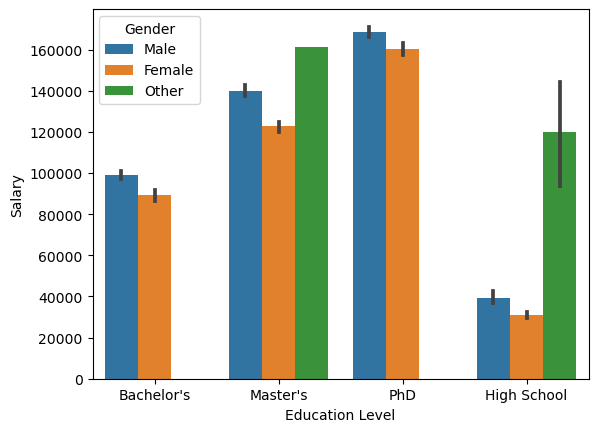

In [132]:
sns.barplot(x="Education Level",y="Salary",hue="Gender",data=data)

In [134]:
import warnings 
warnings.filterwarnings('ignore')

data_corr=data.corr()
print(data_corr)


                          Age  Years of Experience    Salary
Age                  1.000000             0.937725  0.728061
Years of Experience  0.937725             1.000000  0.808968
Salary               0.728061             0.808968  1.000000


<Axes: >

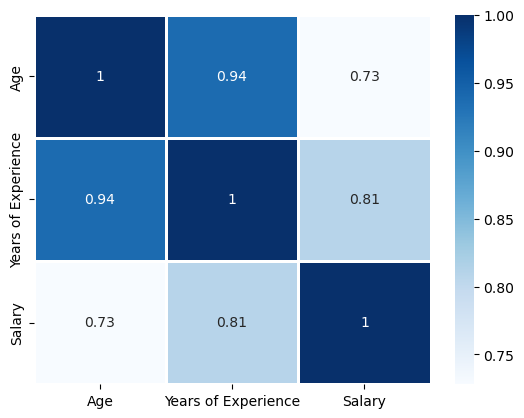

In [135]:
sns.heatmap(data_corr,annot=True,cmap="Blues",linewidths=1)

<Axes: xlabel='Age', ylabel='Salary'>

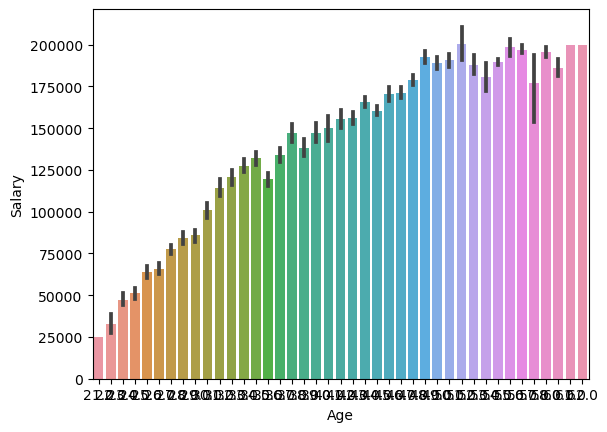

In [136]:
sns.barplot(x="Age",y="Salary",data=data)

<Axes: xlabel='Age', ylabel='Salary'>

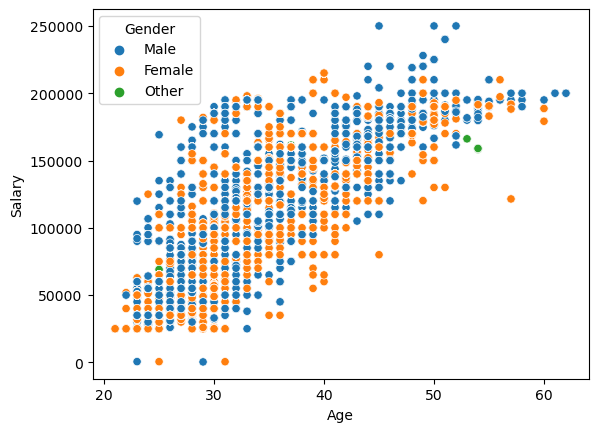

In [137]:
sns.scatterplot(x="Age",y="Salary",data=data,hue="Gender")

<Axes: xlabel='Age', ylabel='Salary'>

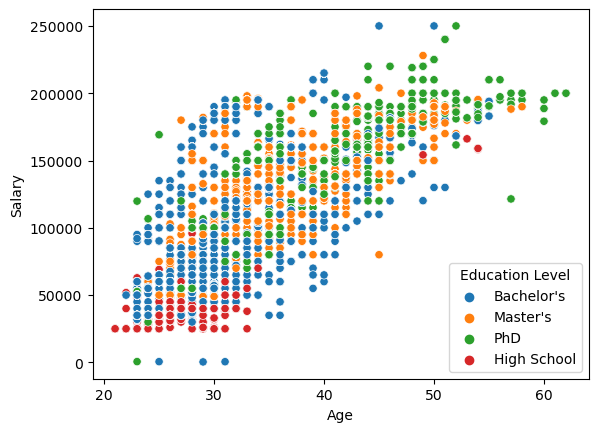

In [36]:
sns.scatterplot(x="Age",y="Salary",data=data,hue="Education Level")

<Axes: xlabel='Years of Experience', ylabel='Salary'>

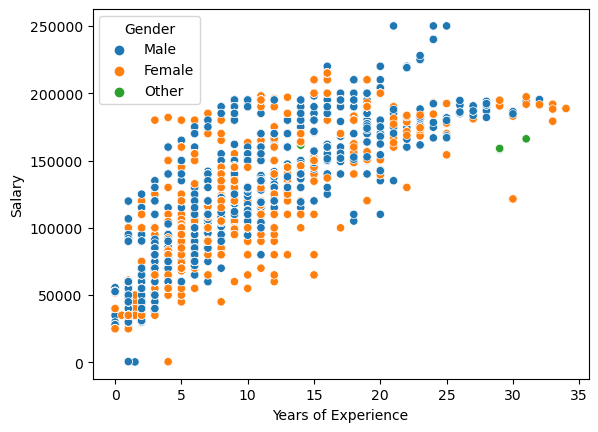

In [37]:
sns.scatterplot(x="Years of Experience",y="Salary",data=data ,hue="Gender")

# Detecting outliers 

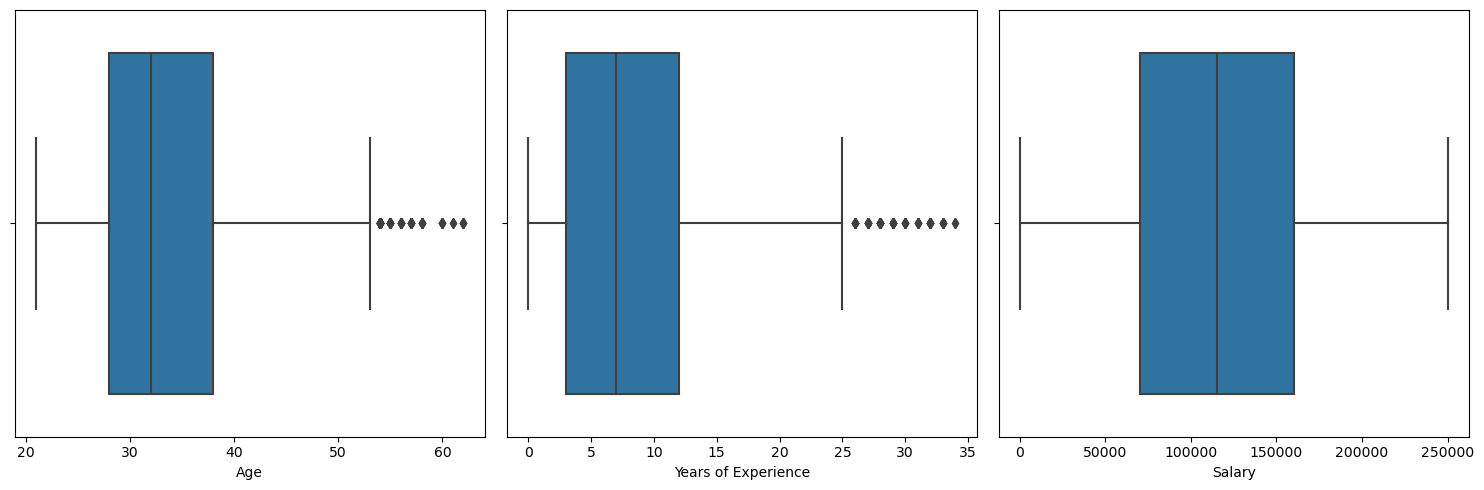

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(15,5)) 

c=['Age','Years of Experience','Salary']
for i,col in enumerate(c):
    sns.boxplot(x=col, data=data, ax=ax[i])

plt.tight_layout()
plt.show()

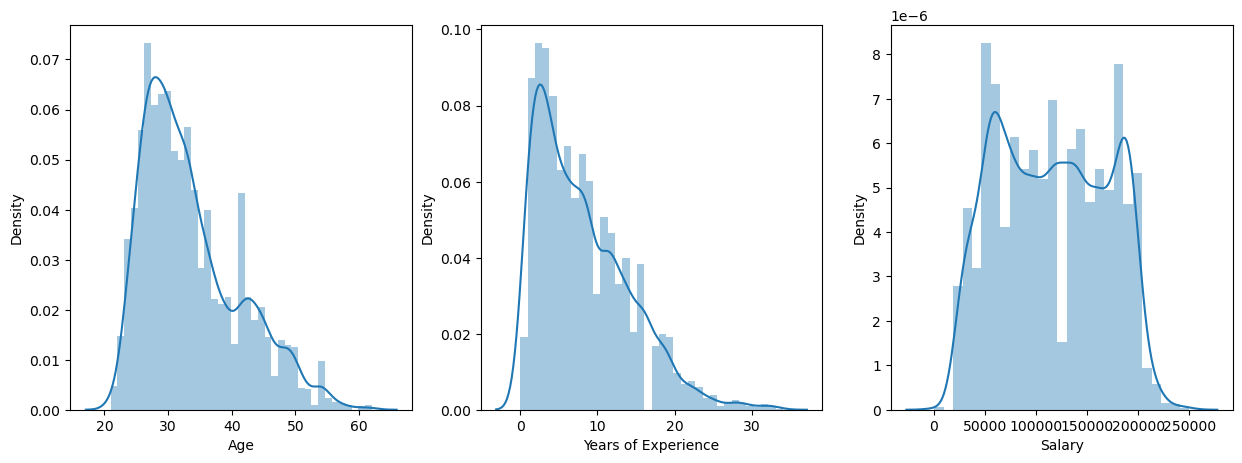

In [139]:
fig,ax= plt.subplots(1,3,figsize=(15,5))
for i,j in enumerate(c) :
    sns.distplot(data[j],ax=ax[i])

# Removing outliers from Age and Years of Experience columns 

In [140]:
q1=data["Age"].quantile(0.25)
q3=data["Age"].quantile(.75)
iqr=q3-q1 
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print("upper_limit :",upper_limit)
print("lower_limit:",lower_limit)

upper_limit : 53.0
lower_limit: 13.0


In [141]:
new_data=data.copy()

# using capping method to remove outliers from age column  

In [142]:
new_data.loc[new_data["Age"]>upper_limit ,"Age"]=upper_limit
new_data.loc[new_data["Age"]<lower_limit ,"Age"]=lower_limit


Text(0.5, 0.98, 'outliers comparison')

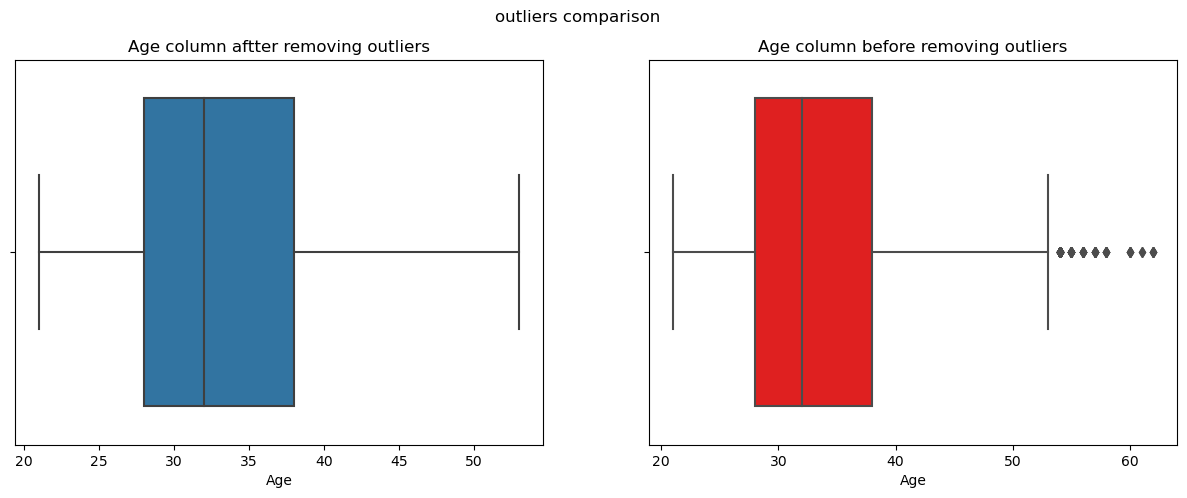

In [143]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="Age",data=new_data,ax=ax[0]).set_title("Age column aftter removing outliers")
sns.boxplot(x="Age",data=data,ax=ax[1],color="r").set_title("Age column before removing outliers")
fig.suptitle("outliers comparison")



# Removing outliers from Years of experience column using Z_score technique 

In [144]:
upper_limit2=new_data["Years of Experience"].mean()+(3*new_data["Years of Experience"].std())
lower_limit2=new_data["Years of Experience"].mean()-(3*new_data["Years of Experience"].std())
Nw=new_data[(new_data["Years of Experience"]>upper_limit2) |(new_data["Years of Experience"]<lower_limit2)]
#printing outliers data
Nw

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2387,53.0,Female,PhD,Full Stack Engineer,30.0,121450.0
2392,52.0,Female,Master's,Senior Software Engineer,28.0,186963.0
2396,53.0,Female,PhD,Software Engineer Manager,33.0,179180.0
2398,53.0,Male,Master's,Senior Software Engineer,27.0,190004.0
...,...,...,...,...,...,...
3047,52.0,Male,Master's,Senior Software Engineer,27.0,186794.0
3058,53.0,Male,Master's,Senior Software Engineer,32.0,195270.0
3084,53.0,Female,PhD,Software Engineer Manager,32.0,191510.0
3104,53.0,Male,PhD,Software Engineer Manager,30.0,184660.0


Text(0.5, 0.98, 'comaprison of before and after removing outliers ')

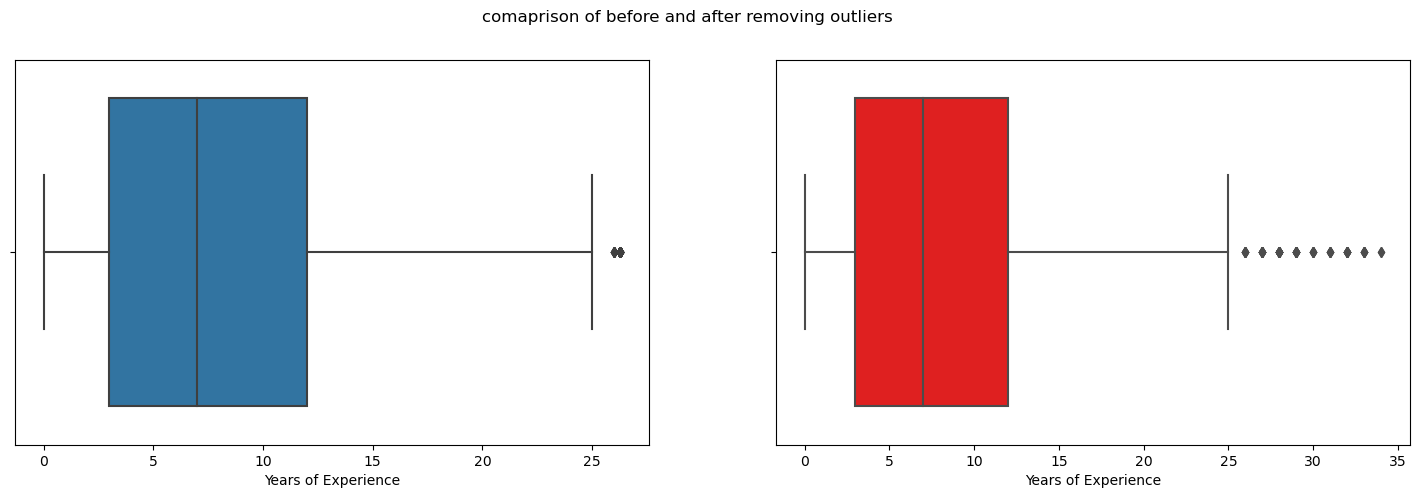

In [145]:
new_data.loc[new_data["Years of Experience"]>upper_limit2 ,"Years of Experience"]=upper_limit2
new_data.loc[new_data["Years of Experience"]<lower_limit2 ,"Years of Experience"]=lower_limit2
fig,ax=plt.subplots(1,2,figsize=(18,5))
sns.boxplot(x="Years of Experience",data=new_data,ax=ax[0])
sns.boxplot(x="Years of Experience",data=data,ax=ax[1],color='r')
fig.suptitle("comaprison of before and after removing outliers ")


In [146]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
lb=LabelEncoder()
OE=OrdinalEncoder()
new_data["labeled_Education Level"]=lb.fit_transform(new_data["Education Level"])
new_data["ordinal_Education Level"]=OE.fit_transform(np.array(new_data["Education Level"]).reshape(-1,1))

In [147]:
new_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,labeled_Education Level,ordinal_Education Level
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,0.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2,2.0
2,45.0,Male,PhD,other,15.0,150000.0,3,3.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0.0
4,52.0,Male,Master's,other,20.0,200000.0,2,2.0
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,3,3.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,1,1.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,0,0.0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0,2,2.0


In [148]:
new_data["Gender_labeled"]=lb.fit_transform(new_data["Gender"])

In [149]:
new_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,labeled_Education Level,ordinal_Education Level,Gender_labeled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,0.0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2,2.0,0
2,45.0,Male,PhD,other,15.0,150000.0,3,3.0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0.0,0
4,52.0,Male,Master's,other,20.0,200000.0,2,2.0,1
...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,3,3.0,0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,1,1.0,1
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,0,0.0,0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0,2,2.0,1


In [150]:
from sklearn.preprocessing import OneHotEncoder 
ohe=OneHotEncoder()
ohe_mat=ohe.fit_transform(new_data[["Job Title"]]).toarray()
print(ohe_mat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [151]:
ohe_mat_df=pd.DataFrame(ohe_mat)
ohe_mat_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
final_df=pd.concat([new_data.reset_index(),ohe_mat_df.reset_index()],axis=1)
final_df

,index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,labeled_Education Level,ordinal_Education Level,Gender_labeled,...,21,22,23,24,25,26,27,28,29,30
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,45.0,Male,PhD,other,15.0,150000.0,3,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,52.0,Male,Master's,other,20.0,200000.0,2,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,3,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6694,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,1,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0,2,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
dummes=pd.get_dummies(new_data,columns=["Job Title"],prefix=["Job Title"],drop_first=True)
dummes

,Age,Gender,Education Level,Years of Experience,Salary,labeled_Education Level,ordinal_Education Level,Gender_labeled,Job Title_Content Marketing Manager,Job Title_Data Analyst,...,Job Title_Sales Director,Job Title_Senior Data Scientist,Job Title_Senior Product Marketing Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Web Developer,Job Title_other
0,32.0,Male,Bachelor's,5.0,90000.0,0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,28.0,Female,Master's,3.0,65000.0,2,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,45.0,Male,PhD,15.0,150000.0,3,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,Female,Bachelor's,7.0,60000.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,Male,Master's,20.0,200000.0,2,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,20.0,200000.0,3,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700,32.0,Male,High School,3.0,50000.0,1,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6701,30.0,Female,Bachelor's,4.0,55000.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6702,46.0,Male,Master's,14.0,140000.0,2,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
dummes.drop(["Gender","Education Level","labeled_Education Level"],axis=1,inplace=True)

In [155]:
dummes

,Age,Years of Experience,Salary,ordinal_Education Level,Gender_labeled,Job Title_Content Marketing Manager,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_Director of HR,Job Title_Director of Marketing,...,Job Title_Sales Director,Job Title_Senior Data Scientist,Job Title_Senior Product Marketing Manager,Job Title_Senior Project Engineer,Job Title_Senior Software Engineer,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Web Developer,Job Title_other
0,32.0,5.0,90000.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,28.0,3.0,65000.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,7.0,60000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,20.0,200000.0,3.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6700,32.0,3.0,50000.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6701,30.0,4.0,55000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6702,46.0,14.0,140000.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
x=dummes.drop("Salary",axis=1)
y=dummes["Salary"]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [58]:
x_train.shape

(4688, 34)

In [59]:
x_test.shape
y_test.shape

(2010,)

# Model Evaluation 

In [60]:
lr=LinearRegression()
#lr.fit(x_train,y_train)

In [61]:
#y_pred=lr.predict(x_test)
#y_pred.shape

In [62]:
#df=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
#df

In [63]:
#print(df["y_test"].dtype)
#print(df["y_pred"].dtype)

# Accuracy Evalution of linear Regression model 

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#mse=mean_squared_error(y_test,y_pred)
#print("mean_squared_error:" ,mse) 
#print("mean absolute error : ",mean_absolute_error(y_test,y_pred))
#print("Root mean squared error :" ,np.sqrt(mse) )
#print("R2 score :",r2_score(y_test,y_pred)*100)

# Decisin tree alghorethm 

In [65]:
from sklearn.tree import DecisionTreeRegressor 

In [66]:
#DST=DecisionTreeRegressor(max_depth=10,min_samples_split=2)
#DST.fit(x_train,y_train)


In [67]:
#y_pred2=DST.predict(x_test)
#DST.score(x_train,y_train)

In [68]:
#mse=mean_squared_error(y_test,y_pred2)
#print("mean_squared_error:" ,mse) 
#print("mean absolute error : ",mean_absolute_error(y_test,y_pred2))
#print("Root mean squared error :" ,np.sqrt(mse) )
#print("R2 score :",r2_score(y_test,y_pred2)*100)

# Random Forest alghorithm 

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
#rf=RandomForestRegressor(n_estimators=90)
#rf.fit(x_train,y_train)

In [71]:
#rf.score(x_train,y_train)

In [72]:
#y_pred3=rf.predict(x_test)


In [73]:
#mse=mean_squared_error(y_test,y_pred3)
#print("mean_squared_error:" ,mse) 
#print("mean absolute error : ",mean_absolute_error(y_test,y_pred3))
#print("Root mean squared error :" ,np.sqrt(mse) )
#print("R2 score :",r2_score(y_test,y_pred3)*100)

# XGBosst alghorithm 

In [74]:
from xgboost import XGBRegressor 

In [75]:
xg=XGBRegressor()
#xg.fit(x_train,y_train)


In [76]:
#y_pred4=xg.predict(x_test)


In [77]:
#xg.score(x_train,y_train)

In [78]:
#mse=mean_squared_error(y_test,y_pred4)
#print("mean_squared_error:" ,mse) 
#print("mean absolute error : ",mean_absolute_error(y_test,y_pred4))
#print("Root mean squared error :" ,np.sqrt(mse) )
#print("R2 score :",r2_score(y_test,y_pred4)*100)

In [79]:
#data

In [80]:
#un_seen_data=np.array([25,"Male","Bachelor's","Flutter Engineer",3]).reshape(1,5)
#un_seen_data.shape

In [81]:
#un_seen_df=pd.DataFrame(un_seen_data,columns=["Age","Gender","Education Level","Job Title","Years of Experience"])
#un_seen_df

In [82]:
#f=pd.get_dummies(un_seen_df,columns=["Education Level","Job Title","Gender"])

In [83]:
#xg.predict(f)

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
parameters={"gamma":[0.01,.1,1,2],"learning_rate":[None,0.1,1,2],"n_estimators":[10,50,100,200],"max_depth":[3,4,5]}
grid_model=GridSearchCV(estimator=xg,param_grid=parameters,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0.01, 0.1, 1, 2],
                         'learning_rate': [None, 0.1, 1, 2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [10, 50, 100, 200]})

In [86]:
print(grid_model.best_params_)

{'gamma': 0.01, 'learning_rate': None, 'max_depth': 5, 'n_estimators': 200}


In [87]:
xg=XGBRegressor(gamma= 0.01,learning_rate=None,max_depth=5,n_estimators=200)
xg.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [88]:
xg.score(x_train,y_train)

0.9867210203570397

In [89]:
y_pred4=xg.predict(x_test)

In [92]:
mse=mean_squared_error(y_test,y_pred4)
print("mean_squared_error:" ,mse) 
print("mean absolute error : ",mean_absolute_error(y_test,y_pred4))
print("Root mean squared error :" ,np.sqrt(mse) )
print("R2 score :",r2_score(y_test,y_pred4)*100)

mean_squared_error: 81829139.87190427
mean absolute error :  4565.2734783115675
Root mean squared error : 9045.946046263169
R2 score : 97.11751467678523


In [93]:
print(grid_model.best_score_)

0.9718224307647686


In [94]:
model1=LinearRegression() 
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()


In [95]:
p1={}
p2={"max_depth":[None,3,4,5],"min_samples_split":[1,2,3,None],"min_samples_leaf":[1,2,3]}
p3={"n_estimators":[50,100,90,200], "max_depth":[None,2,3,4,5],"min_samples_split":[1,2,3,None]}


In [96]:
dict_={"Regression":[model1,p1],"Decisiontree":[model2,p2],"RanomForest":[model3,p3]}
for m,i in dict_.items():
    l=i
    grid_model2=GridSearchCV(estimator=l[0],param_grid=l[1],cv=5)
    grid_model2.fit(x_train,y_train)
    print("best parameters for model",m,"=",grid_model2.best_params_)
         

best parameters for model Regression = {}
best parameters for model Decisiontree = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
best parameters for model RanomForest = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 90}


In [97]:
model2=DecisionTreeRegressor(max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
model3=RandomForestRegressor(max_depth= None, min_samples_split= 2, n_estimators= 200)
model2.fit(x_train,y_train)



DecisionTreeRegressor()

In [98]:
y2_pred=model2.predict(x_test)

In [99]:
r2_score(y_test,y2_pred)*100

96.69125220574237

In [100]:
model3.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [101]:
y3_pred=model3.predict(x_test)

In [102]:
r2_score(y_test,y3_pred)*100

97.2835663710969